# PRACTICAL COMPONENT ANALYSIS (PCA)

In [1]:
# Loading the essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the DataSet
data = pd.read_csv(r'C:\Users\DELL\Desktop\Data Science\Assignment Questions\PCA\wine.csv')
print(data)

     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  D

In [3]:
# Task 1::
# Exploratory Data Analysis (EDA)
# Basic data exploration
print(data.head())
print(data.describe())
print(data.info())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.0

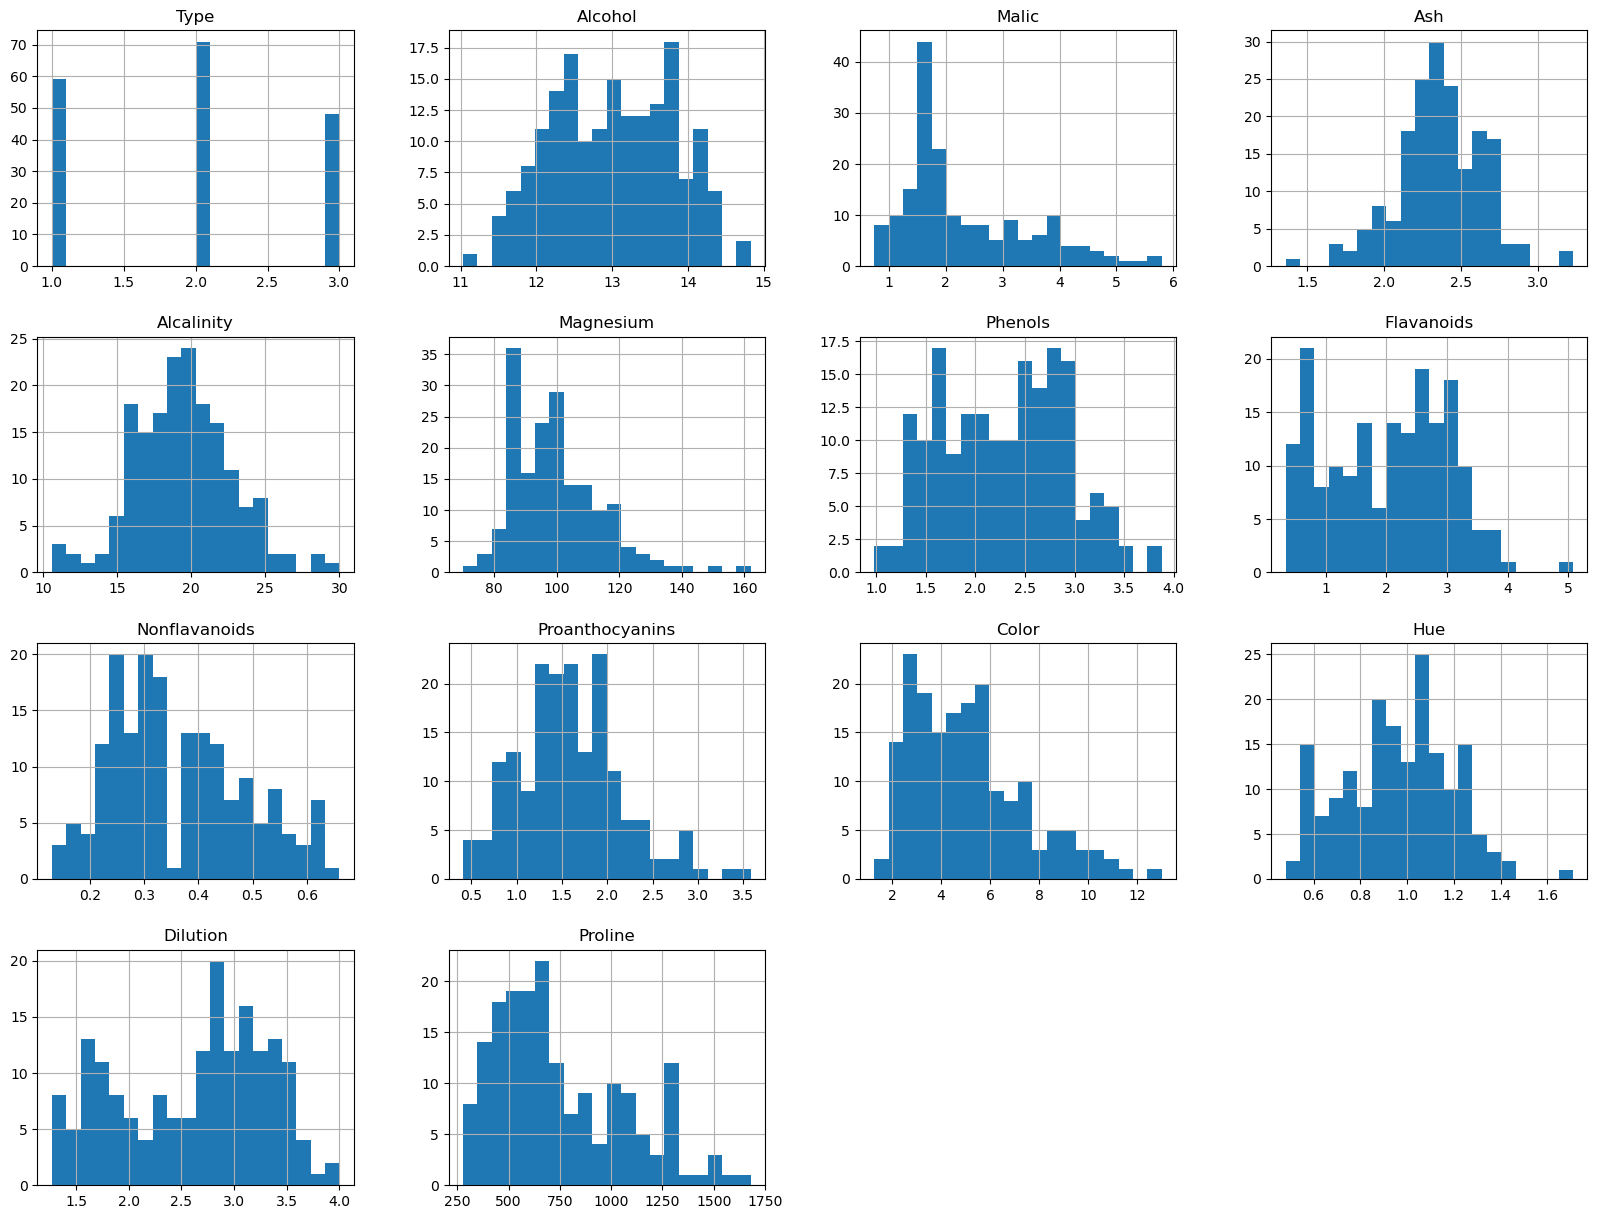

In [4]:
# Examine the distribution of features
data.hist(bins=20, figsize=(20, 15))
plt.show()

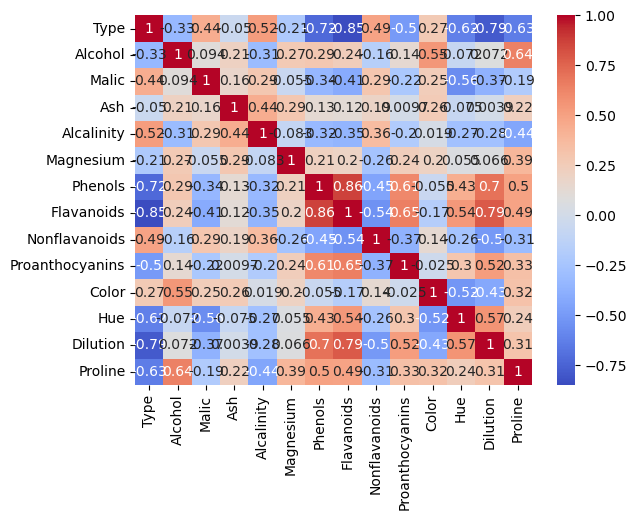

In [5]:
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

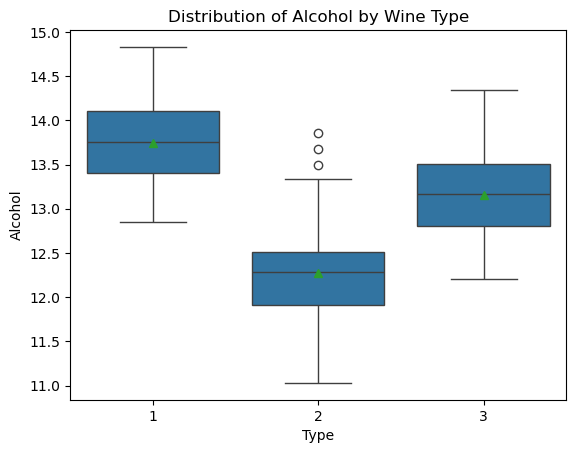

In [6]:
sns.boxplot(data=data,x="Type", y="Alcohol",showmeans=True)
plt.title("Distribution of Alcohol by Wine Type") 
plt.show()

In [7]:
# Dimensionality Reduction with PCA:
# standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [8]:
#implementing pca
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

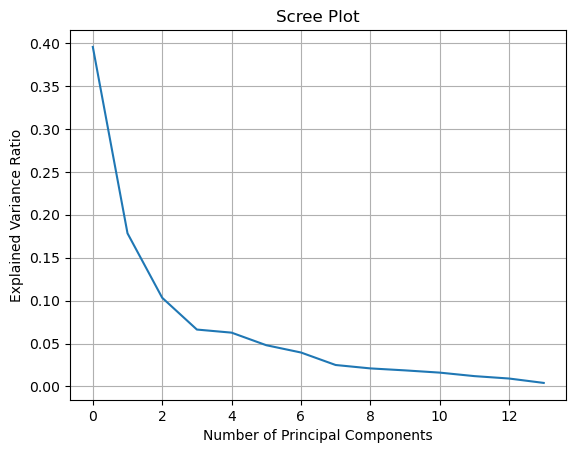

In [9]:
# scree plot
explained_variance = pca.explained_variance_ratio_
plt.plot(explained_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

In [10]:
pca = PCA(n_components=2)  
reduced_data = pca.fit_transform(scaled_data) # transforming the data again
print(reduced_data)

[[-3.5229339   1.45309844]
 [-2.52885806 -0.33001925]
 [-2.78502898  1.03693595]
 [-3.92258841  2.76821026]
 [-1.40751111  0.86777309]
 [-3.28812981  2.13017513]
 [-2.75057754  1.17916999]
 [-2.39286652  1.61128232]
 [-2.79525633  0.92317952]
 [-3.00559666  0.79628417]
 [-3.67868855  1.31252342]
 [-2.10963477  0.61298199]
 [-2.43845636  0.67852331]
 [-3.67349453  1.14012136]
 [-4.44157575  2.11031917]
 [-2.60892387  1.66641801]
 [-2.47542846  2.33089672]
 [-2.22623243  1.63359016]
 [-3.74226929  2.52840527]
 [-2.3944115   1.06452946]
 [-3.33656895  0.79601279]
 [-1.48140399  0.24008547]
 [-2.82806867 -0.08685755]
 [-2.00771405 -0.51561649]
 [-2.11463604 -0.31592057]
 [-1.39753751  0.93821529]
 [-2.13348803  0.68710205]
 [-1.62970383 -0.09118403]
 [-2.50760753  0.69274983]
 [-2.55948318  0.1954729 ]
 [-2.77244452  1.24635279]
 [-2.93513374  1.47827883]
 [-1.99124842  0.05325201]
 [-2.24570987  1.6346691 ]
 [-1.78698628  0.69748039]
 [-2.22763867  0.17928892]
 [-1.76802847  0.65787231]
 

In [11]:
# Clustering with Original Data
kmeans = KMeans(n_clusters=3) 
kmeans.fit(data)

KMeans(n_clusters=3)

In [12]:
cluster_labels = kmeans.labels_

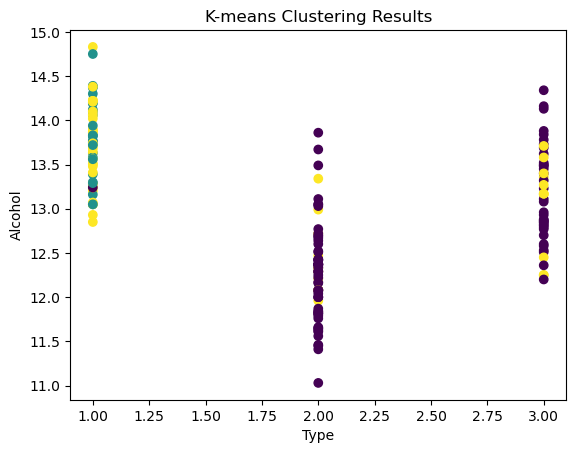

In [13]:
# using scatterplot to visualize scatter plot
plt.scatter(data["Type"], data["Alcohol"], c=cluster_labels)  # Replace features with your desired axes
plt.xlabel("Type")
plt.ylabel("Alcohol")
plt.title("K-means Clustering Results")
plt.show()


In [14]:
silhouette_coeff = silhouette_score(data, cluster_labels)
print("Silhouette Score:", silhouette_coeff)

Silhouette Score: 0.5532635177802722


In [15]:
db_score = davies_bouldin_score(data, cluster_labels)
print("Davies-Bouldin Score:", db_score)


Davies-Bouldin Score: 0.5528935810097918


In [16]:
# Clustering with PCA Data:
# K-means clustering on PCA-transformed data 
kmeans_pca = KMeans(n_clusters=3)  
kmeans_pca.fit(reduced_data)

KMeans(n_clusters=3)

In [17]:
cluster_labels_pca = kmeans_pca.labels_

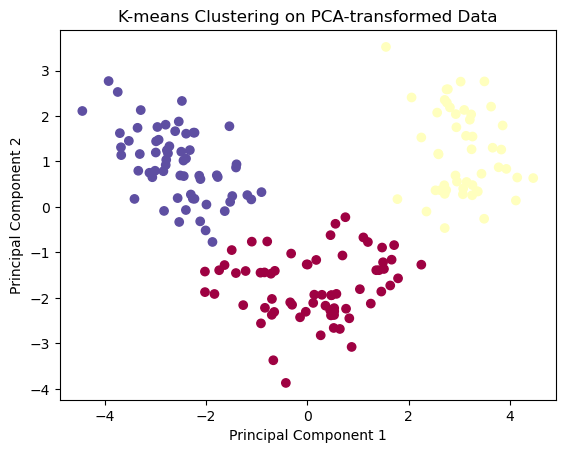

In [18]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels_pca, cmap='Spectral')  # Using different colormap
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering on PCA-transformed Data")
plt.show()

In [19]:
print("**Comparison:**")
print("Silhouette Score (Original):", silhouette_score(data, cluster_labels))
print("Silhouette Score (PCA):", silhouette_score(reduced_data, cluster_labels_pca))
print("Davies-Bouldin Score (Original):", davies_bouldin_score(data, cluster_labels))
print("Davies-Bouldin Score (PCA):", davies_bouldin_score(reduced_data, cluster_labels_pca))


**Comparison:**
Silhouette Score (Original): 0.5532635177802722
Silhouette Score (PCA): 0.6024415520362844
Davies-Bouldin Score (Original): 0.5528935810097918
Davies-Bouldin Score (PCA): 0.5397078562575712


In [ ]:
Comparison and Analysis:

Higher silhoutte score indicate better clustering. 
Original data score is 0.57 where as silhouette score for PCA data is 0.60 which indicates better clustering.

Conclusion and Insights

Key findings and insights: 
    
I explored the wine dataset using EDA, examining feature distributions and correlations. 
PCA has been implemented to reduce the dimensionality of the data. k means clustering was applied to both the original and 
    pca transformed data tp group wine samples based on their characteristics The clustering performance is evaluated using 
    silhouette score and davies-bouldin score.
    
Practical implications of PCA and clustering: PCA: simplifies data analysis by reducing complexity useful for visualisation when 
                                                   dealing with many features.

clustering: groups data points into meaningful categories based on similarities..
                                                                                                         
3. reccomendations for using pca and clustering
use pca when dealing with high dimensional data that might be computationally expensive for clustering algo